In [18]:
from PIL import Image
from IPython.display import display
import numpy as np

In [2]:
im1 = Image.open("library/library1.png")
im2 = Image.open("library/library2.png")
im3 = Image.open("library/library3.png")
im_x1 = Image.open("library/library-x1.png")
im_x2 = Image.open("library/library-x2.png")

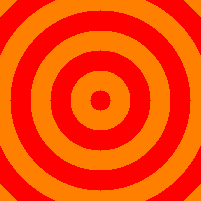

In [3]:
im1

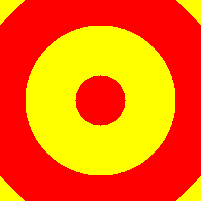

In [4]:
im2

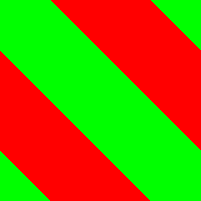

In [5]:
im3

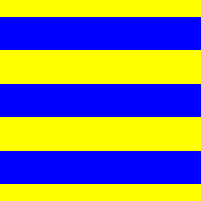

In [6]:
im_x1

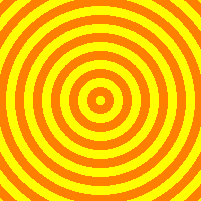

In [7]:
im_x2

In [34]:
basis_images = [im1,im2,im3,im_x1,im_x2]

In [8]:
im_2s = [Image.open(f"library/2-{i+1}.png") for i in range(7)]

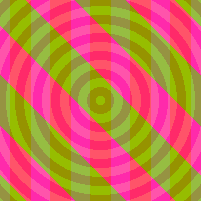

In [9]:
im_2s[0]

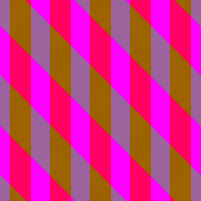

In [10]:
Image.blend(im1, im_2s[6],1.5)

In [11]:
im_x3 = Image.blend(im_2s[2], im_x1,-10)

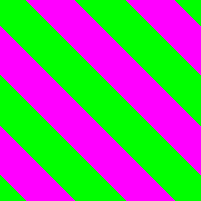

In [12]:
im_x3

In [35]:
basis_images.append(im_x3)

In [13]:
im_x4 = Image.blend(Image.blend(im1, im_2s[6],1.5), im_x3, -2)

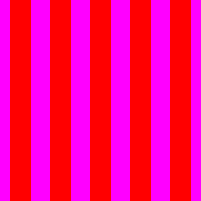

In [14]:
im_x4

In [36]:
basis_images.append(im_x4)

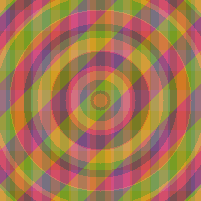

In [69]:
im_2s[1]

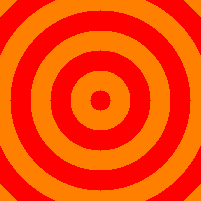

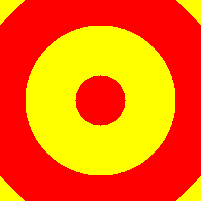

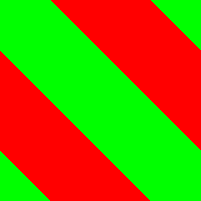

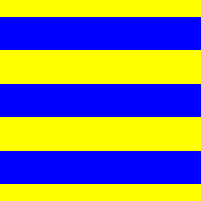

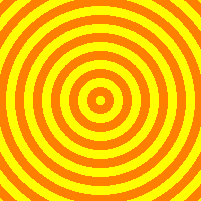

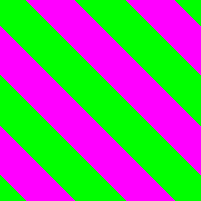

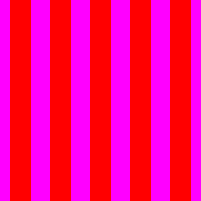

In [68]:
for im in basis_images:
    display(im)

In [77]:
def to_array(img):
    return np.array(img).flatten()

In [78]:
to_array(im_x3)

array([  0, 255,   0, ..., 255,   0, 255], dtype=uint8)

In [79]:
basis = np.stack([to_array(im) for im in basis_images], axis=1)

In [80]:
basis.shape

(161604, 7)

In [81]:
to_array(im_2s[1]).shape

(161604,)

In [82]:
np.linalg.lstsq(np.stack([to_array(im) for im in basis_images], axis=1), to_array(im_2s[2]))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


(array([-2.39711939e-14, -1.66309048e-14, -1.00977430e-15,  4.43137255e-01,
         1.00706966e-14,  5.56862745e-01,  3.37092107e-16]),
 array([7.8496433e-18]),
 7,
 array([186976.17058397,  53711.9968738 ,  44749.16541162,  44352.06307476,
         33742.52341003,  21755.90429393,  17185.15769017]))